# Verde Example

This example is from: https://www.fatiando.org/verde/latest/gallery/train_test_split.html#sphx-glr-gallery-train-test-split-py

It worked without modification :) Verde & Fatiando a Terra team has great doc's, and a slack for question

In [1]:
%matplotlib inline


# Splitting data into train and test sets

Verde gridders are mostly linear models that are used to predict data at new
locations. As such, they are subject to *over-fitting* and we should always
strive to quantify the quality of the model predictions (see
`model_evaluation`). Common practice for
doing this is to split the data into training (the one that is used to fit the
model) and testing (the one that is used to validate the predictions) datasets.

These two datasets can be generated by splitting the data randomly (without
regard for their positions in space). This is the default behaviour of function
:func:`verde.train_test_split`, which is based on the scikit-learn function
:func:`sklearn.model_selection.train_test_split`. This can be problematic if
the data points are autocorrelated (values close to each other spatially tend
to have similar values). In these cases, splitting the data randomly can
overestimate the prediction quality [Roberts_etal2017]_.

Alternatively, Verde allows splitting the data along *spatial blocks*. In this
case, the data are first grouped into blocks with a given size and then the
blocks are split randomly between training and testing sets.

This example compares splitting our sample dataset using both methods.


Train and test size for random splits: 66376 16594
Train and test size for block splits:  66585 16385


/Users/tmartin/opt/anaconda3/envs/ml_scratch/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


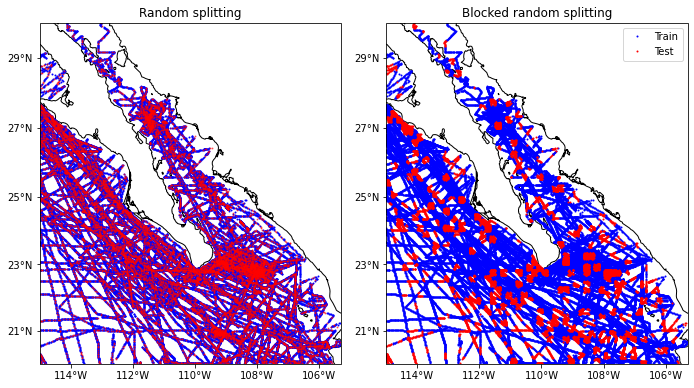

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import verde as vd

# Let's split the Baja California shipborne bathymetry data
data = vd.datasets.fetch_baja_bathymetry()
coordinates = (data.longitude, data.latitude)
values = data.bathymetry_m

# Assign 20% of the data to the testing set.
test_size = 0.2

# Split the data randomly into training and testing. Set the random state
# (seed) so that we get the same result if running this code again.
train, test = vd.train_test_split(
    coordinates, values, test_size=test_size, random_state=123
)
# train and test are tuples = (coordinates, data, weights).
print("Train and test size for random splits:", train[0][0].size, test[0][0].size)

# A different strategy is to first assign the data to blocks and then split the
# blocks randomly. To do this, specify the size of the blocks using the
# 'spacing' argument.
train_block, test_block = vd.train_test_split(
    coordinates,
    values,
    spacing=10 / 60,
    test_size=test_size,
    random_state=213,
)
# Verde will automatically attempt to balance the data between the splits so
# that the desired amount is assigned to the test set. It won't be exact since
# blocks contain different amounts of data points.
print(
    "Train and test size for block splits: ",
    train_block[0][0].size,
    test_block[0][0].size,
)

# Cartopy requires setting the coordinate reference system (CRS) of the
# original data through the transform argument. Their docs say to use
# PlateCarree to represent geographic data.
crs = ccrs.PlateCarree()

# Make Mercator maps of the two different ways of splitting
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 6), subplot_kw=dict(projection=ccrs.Mercator())
)

# Use an utility function to setup the tick labels and the land feature
vd.datasets.setup_baja_bathymetry_map(ax1)
vd.datasets.setup_baja_bathymetry_map(ax2)

ax1.set_title("Random splitting")
ax1.plot(*train[0], ".b", markersize=2, transform=crs, label="Train")
ax1.plot(*test[0], ".r", markersize=2, transform=crs, label="Test", alpha=0.5)

ax2.set_title("Blocked random splitting")
ax2.plot(*train_block[0], ".b", markersize=2, transform=crs, label="Train")
ax2.plot(*test_block[0], ".r", markersize=2, transform=crs, label="Test")
ax2.legend(loc="upper right")

plt.subplots_adjust(wspace=0.15, top=1, bottom=0, left=0.05, right=0.95)
plt.show()